In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import time

In [ ]:
cd /content/drive/My Drive/ML/Bootcamp/Assignment5

/content/drive/My Drive/ML/Bootcamp/Assignment5


#**Processing Data**

##Load data

In [ ]:
datat1 =  pd.read_csv('t1.csv')
datat2 =  pd.read_csv('t2.csv')
datat3 =  pd.read_csv('t3.csv')
datat4 =  pd.read_csv('t4.csv')
datat5 =  pd.read_csv('t5.csv')
datat6 =  pd.read_csv('t6.csv')
datat7 =  pd.read_csv('t7.csv')
datat1_19 =  pd.read_csv('t1-19.csv')
datat2_19 =  pd.read_csv('t2-19.csv')
datat3_19 =  pd.read_csv('t3-19.csv')
datat4_19 =  pd.read_csv('t4-19.csv')
datat5_19 =  pd.read_csv('t5-19.csv')
datat6_19 =  pd.read_csv('t6-19.csv')
datat7_19 =  pd.read_csv('t7-19.csv')
datat8_19 =  pd.read_csv('t8-19.csv')
datat9_19 =  pd.read_csv('t9-19.csv')
datat10_19 =  pd.read_csv('t10-19.csv')
datat11_19 =  pd.read_csv('t11-19.csv')
datat12_19 =  pd.read_csv('t12-19.csv')

##Create Data for 2019 and 2020

In [ ]:
data_2020 = datat7.append(datat6).append(datat5).append(datat4).append(datat3).append(datat2).append(datat1).reset_index()
data_2019 = datat12_19.append(datat11_19).append(datat10_19).append(datat9_19).append(datat8_19).append(datat7_19).append(datat6_19).append(datat5_19).append(datat4_19).append(datat3_19).append(datat2_19).append(datat1_19).reset_index()

In [ ]:
data_2020.head(10)

,index,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,0,2020,3,7,29,3,13485,13487,MSP,1455.0,-5.0,8.0,1503.0,1543.0,6.0,1549.0,-13.0,0,54.0,40.0,1,228
1,1,2020,3,7,30,4,13485,13487,MSP,1455.0,-5.0,10.0,1505.0,1547.0,5.0,1552.0,-10.0,0,57.0,42.0,1,228
2,2,2020,3,7,31,5,13485,13487,MSP,1455.0,-5.0,10.0,1505.0,1547.0,11.0,1558.0,-4.0,0,63.0,42.0,1,228
3,3,2020,3,7,1,3,13487,13485,MSN,1056.0,-4.0,11.0,1107.0,1145.0,3.0,1148.0,-8.0,0,52.0,38.0,1,228
4,4,2020,3,7,2,4,13487,13485,MSN,1246.0,-9.0,15.0,1301.0,1338.0,4.0,1342.0,-13.0,0,56.0,37.0,1,228
5,5,2020,3,7,3,5,13487,13485,MSN,1250.0,-5.0,12.0,1302.0,1340.0,4.0,1344.0,-11.0,0,54.0,38.0,1,228
6,6,2020,3,7,4,6,13487,13485,MSN,1250.0,-5.0,12.0,1302.0,1337.0,3.0,1340.0,-15.0,0,50.0,35.0,1,228
7,7,2020,3,7,5,7,13487,13485,MSN,1250.0,-5.0,13.0,1303.0,1338.0,4.0,1342.0,-13.0,0,52.0,35.0,1,228
8,8,2020,3,7,6,1,13487,13485,MSN,1321.0,26.0,11.0,1332.0,1407.0,2.0,1409.0,14.0,0,48.0,35.0,1,228
9,9,2020,3,7,7,2,13487,13485,MSN,1252.0,-3.0,9.0,1301.0,1338.0,2.0,1340.0,-15.0,0,48.0,37.0,1,228


##Correlation

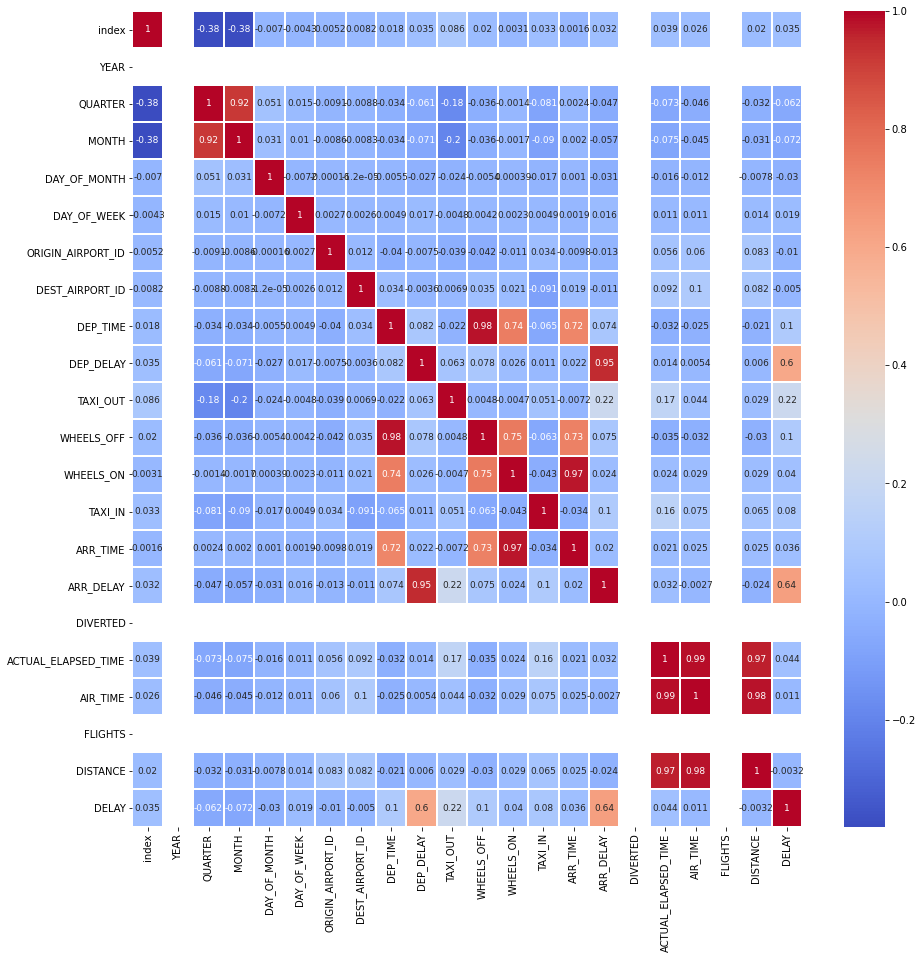

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) 
# sns.heatmap(dataframe.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
sns.heatmap(data_2020.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})

##Visualization

Correlation between the number of flights to particular destination and delay tim

In [ ]:
a0 = data_2020['DEST']
b0 = data_2020['ARR_DELAY']
d0 = {"Destination":a0,"Delay":b0}

In [ ]:
data_dest_arr = pd.DataFrame(data=d0)
data_dest_arr = data_dest_arr.set_index('Destination').groupby(by = 'Destination').sum()

In [ ]:
data_dest_arr.filter(like = 'DFW',axis=0)

,Delay
Destination,
DFW,111610.0


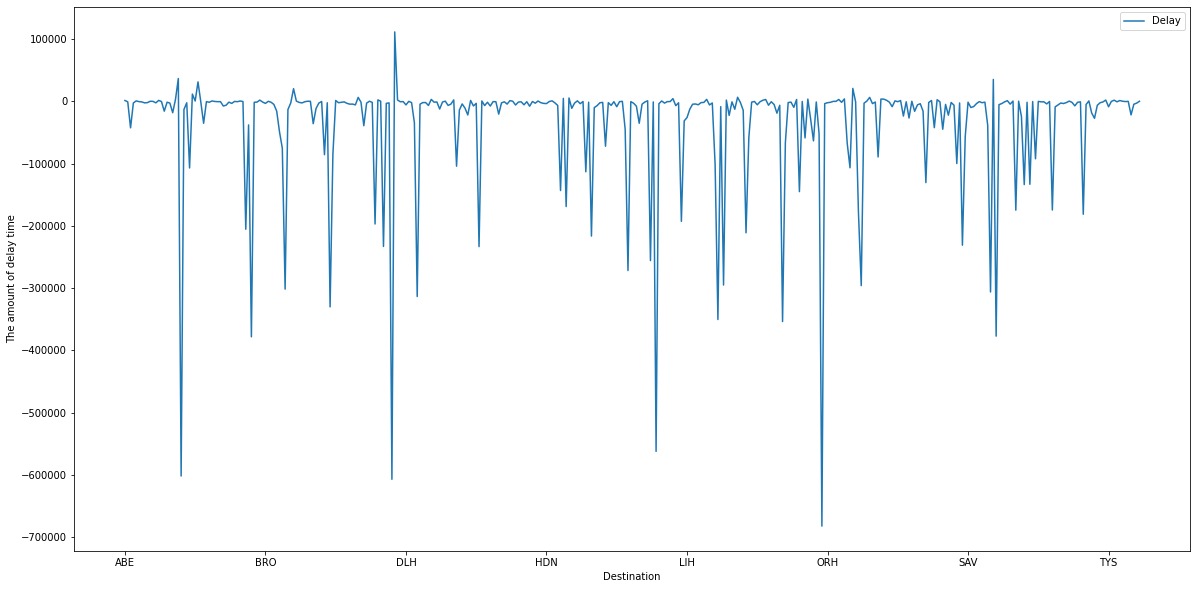

In [ ]:
data_dest_arr.plot.line(xlabel = 'Destination', ylabel = 'The amount of delay time',figsize = (20,10))

In [ ]:
data_2020_dest = pd.DataFrame(data_2020['DEST'].value_counts())

In [ ]:
data_2020_dest

,DEST
ATL,146495
DFW,130801
ORD,120915
DEN,110081
CLT,102220
...,...
BFM,46
CDB,44
PPG,26
BKG,23


###Day of Month

In [ ]:
data_2020_day_month = pd.DataFrame(data_2020['DAY_OF_MONTH'].value_counts().sort_index(axis='index'))
data_2019_day_month = pd.DataFrame(data_2019['DAY_OF_MONTH'].value_counts().sort_index(axis='index'))

In [ ]:
data_day_month = []
data_day_month = data_2020_day_month
# data_day_month = data_day_month.insert(loc = 1,column = "2019",value = data_2019_day_month)
data_day_month = data_day_month.rename(columns={'DAY_OF_MONTH':'2020'})

In [ ]:
data_day_month

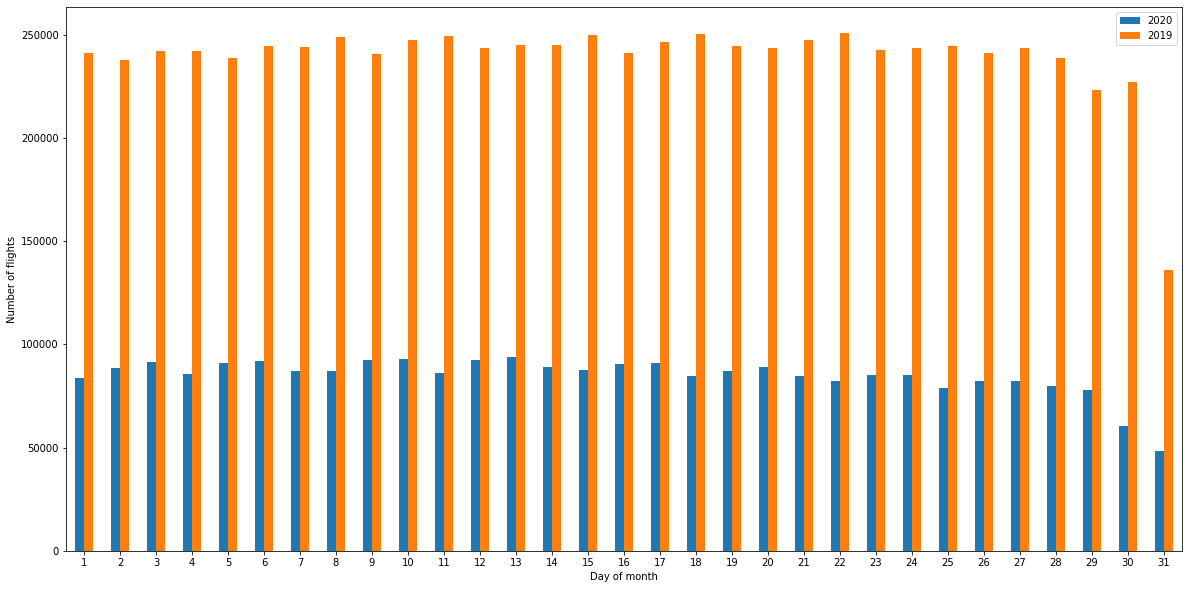

In [ ]:
data_day_month.plot.bar(rot=0, xlabel = 'Day of month', ylabel = 'Number of flights', figsize=(20,10))

The number of flights is stable everyday, but 31th is lowest. There are two reasons for that:

+ There is only 7 months having 31th.

+ 31th is a final day each months, so people usually have plan to new month. This make the number of flights for travelling lowest. .


In [ ]:
a = data_2020['DAY_OF_MONTH']
b = data_2020['ARR_DELAY']
d = {"Day of month":a,"Delay":b}

In [ ]:
data_month_arr = pd.DataFrame(data=d)
data_month_arr = data_month_arr.set_index('Day of month').groupby(by = 'Day of month').sum()
# data_month_arr.groupby(by = 'Day of month').sum()

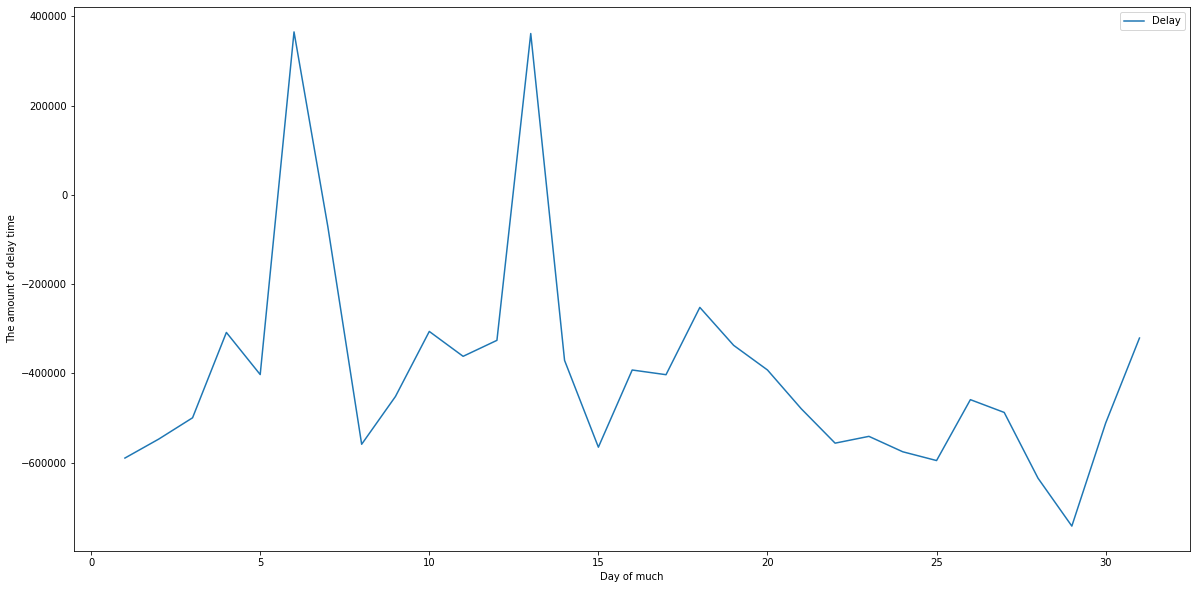

In [ ]:
data_month_arr.plot.line(xlabel = 'Day of month', ylabel = 'The amount of delay time',figsize = (20,10))

###Week

In [ ]:
data_2020_day_week = pd.DataFrame(data_2020['DAY_OF_WEEK'].value_counts().sort_index(axis='index'))
data_2019_day_week = pd.DataFrame(data_2019['DAY_OF_WEEK'].value_counts().sort_index(axis='index'))

In [ ]:
data_week = data_2020_day_week
data_week = data_week.insert(loc = 1,column = "2019",value = data_2019_day_week)

In [ ]:
data_week

,2020,2019
Su,386795,1107285
Mo,356080,1077957
Tu,380521,1075379
We,402608,1094899
Th,401235,1103049
Fri,325034,906745
Sat,375793,1056723


In [ ]:
data_week = data_week.rename(columns={'DAY_OF_WEEK':'2020'},index={1:'Su',2:'Mo',3:'Tu',4:'We',5:'Th',6:'Fri',7:'Sat'})

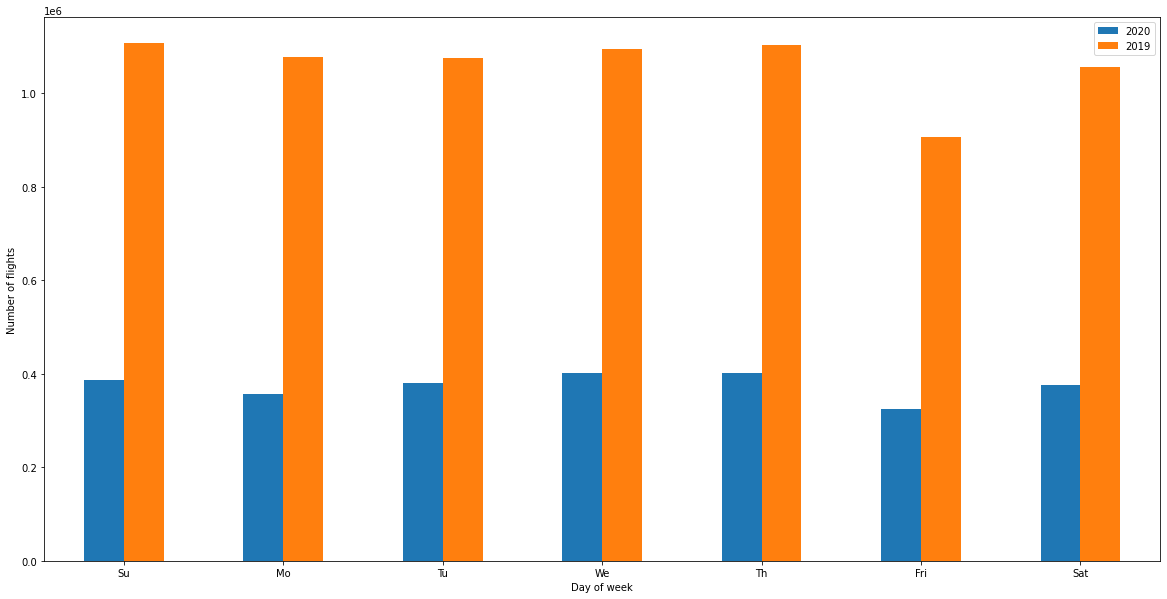

In [ ]:
data_week.plot.bar(rot=0, xlabel = 'Day of week', ylabel = 'Number of flights', figsize=(20,10))

Although the number of flights in 2019 was twice as much as that of in 2020, that had the same rate everyday in a week.

* Sunday was one of the highest, because of travelling to work on Monday.

* Friday was lowest, because it is coming to weekend.

* Wednesday and Thurday are highest, people ussually flight to work.

In [ ]:
a1 = data_2020['DAY_OF_WEEK']
b1 = data_2020['ARR_DELAY']
d1 = {"Day of week":a1,"Delay":b1}

In [ ]:
data_week_arr = pd.DataFrame(data=d1)
data_week_arr = data_week_arr.set_index('Day of week').groupby(by = 'Day of week').sum()

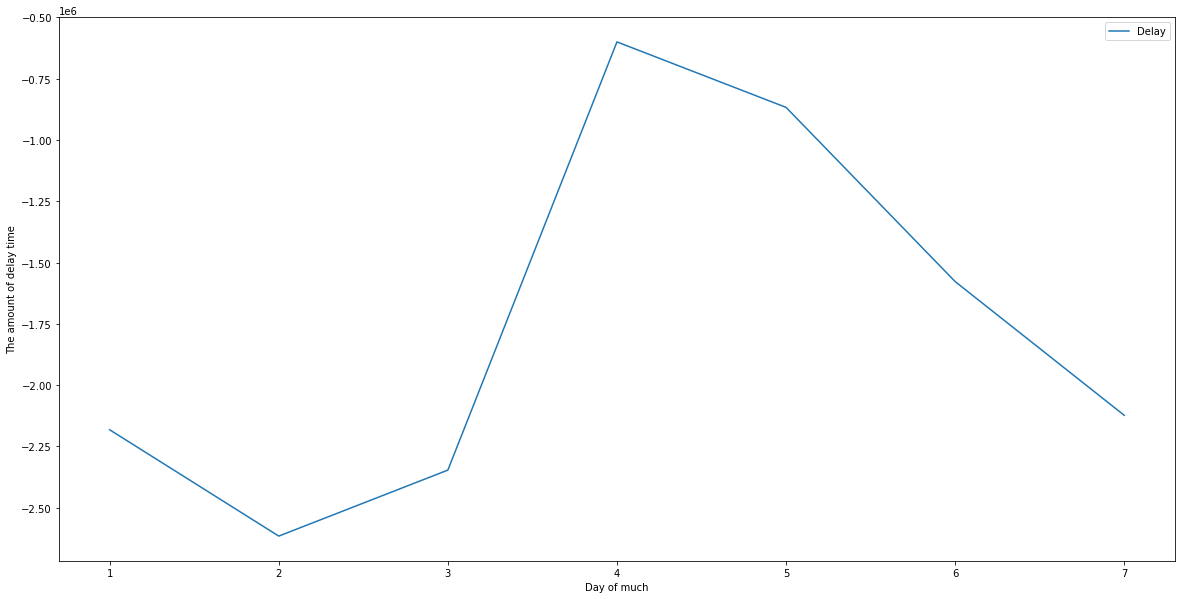

In [ ]:
data_week_arr.plot.line(xlabel = 'Day of much', ylabel = 'The amount of delay time',figsize = (20,10))

###Month

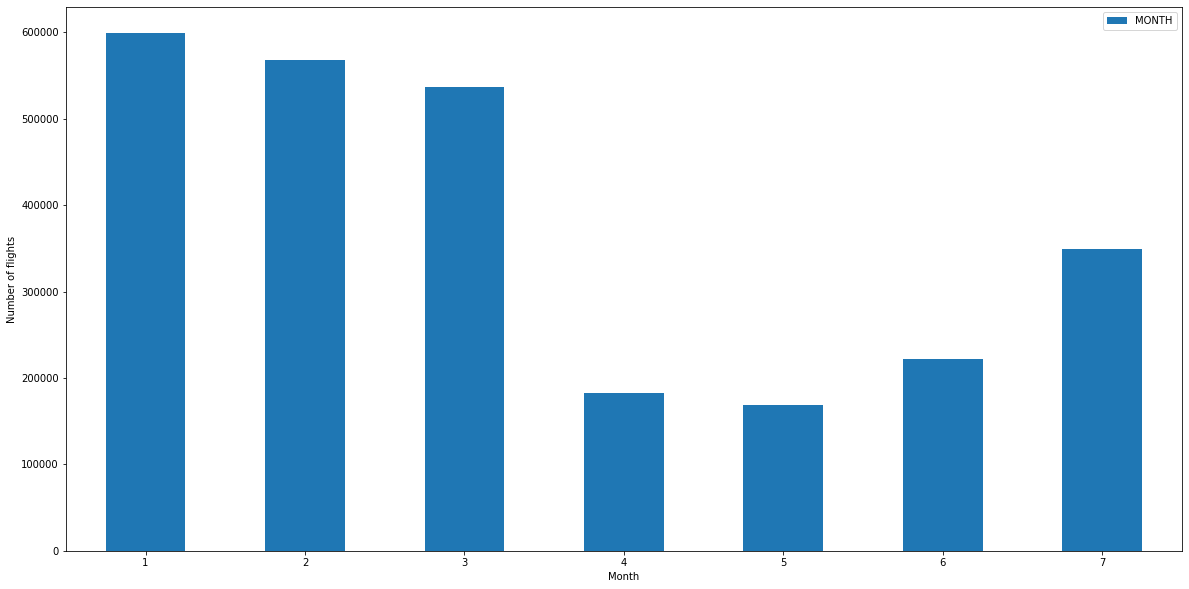

In [ ]:
data_2020_month = pd.DataFrame(data_2020['MONTH'].value_counts().sort_index(axis='index'))
data_2020_month.plot.bar(rot = 0, xlabel = 'Month',ylabel = 'Number of flights',figsize = (20,10))

Because of the pandemic in 2020, the number of flight sharply decreased from March and made a recovery from June. We can see clearly in Diagram below:

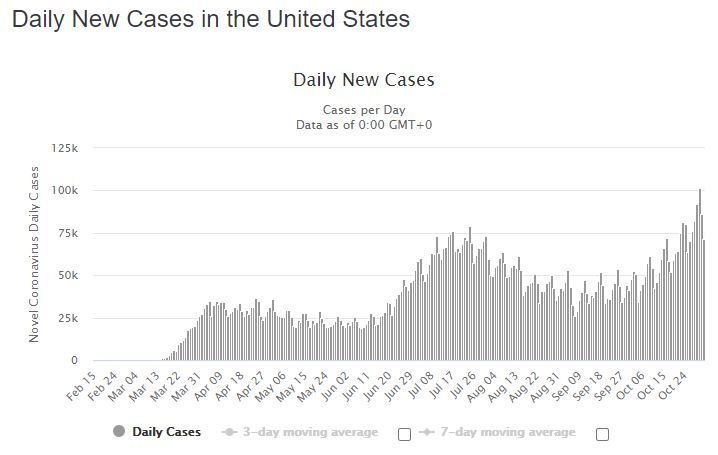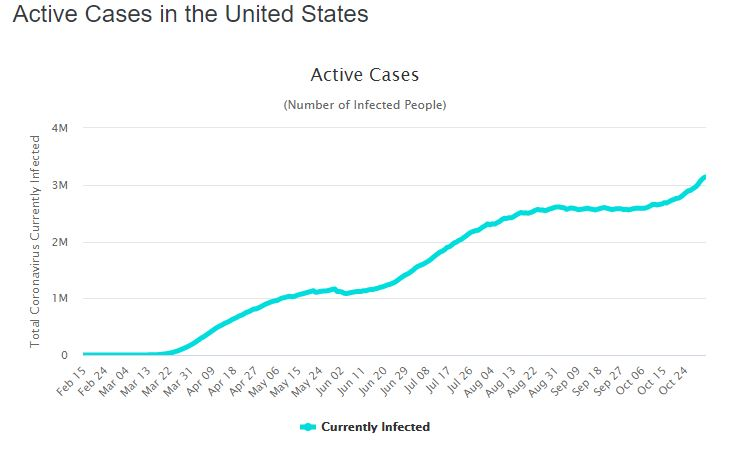

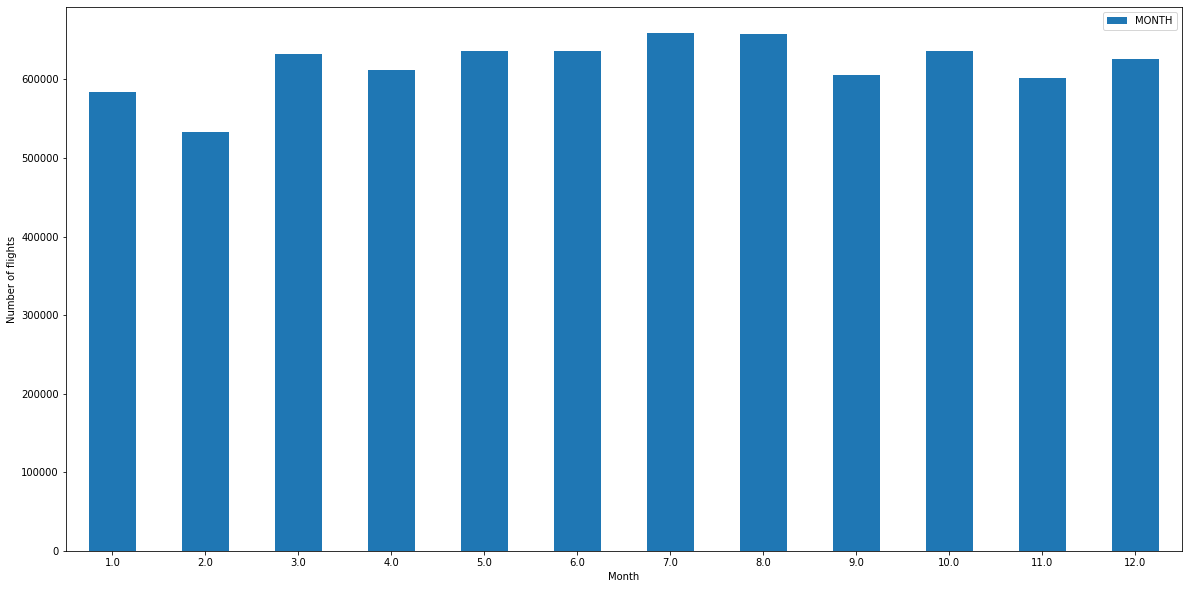

In [ ]:
data_2019_month = pd.DataFrame(data_2019['MONTH'].value_counts().sort_index(axis='index'))
data_2019_month.plot.bar(rot = 0, xlabel = 'Month',ylabel = 'Number of flights',figsize = (20,10))

In 2019, the number of flights in July and August is highest because of summer vacation.

###Quarter

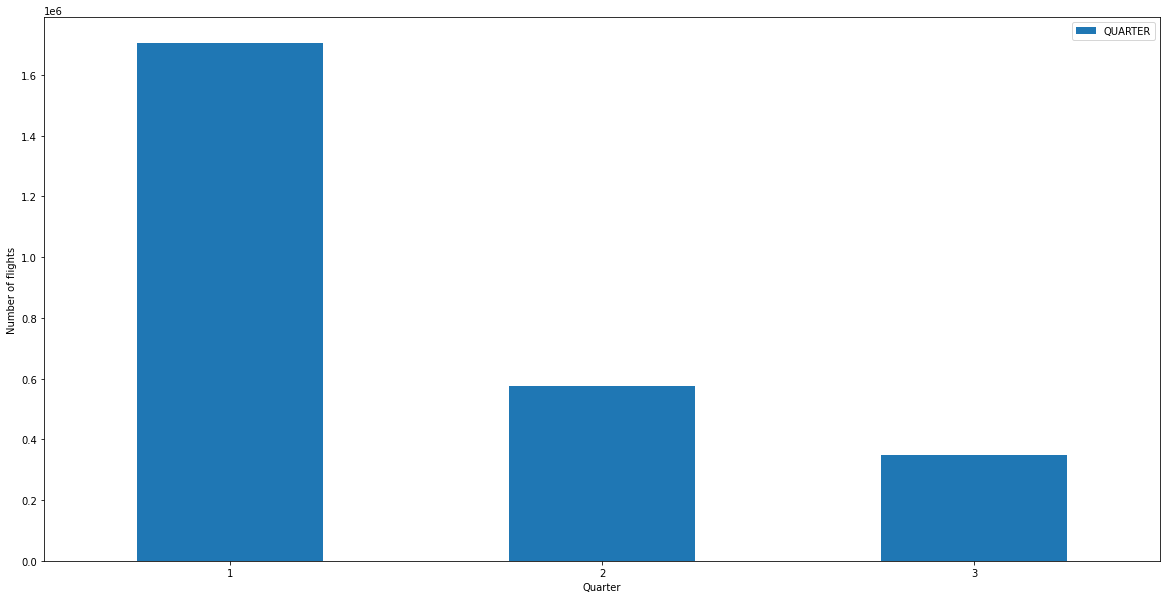

In [ ]:
data_2020_quarter = pd.DataFrame(data_2020['QUARTER'].value_counts().sort_index(axis='index'))
data_2020_quarter.plot.bar(rot=0,figsize= (20,10),xlabel='Quarter', ylabel = 'Number of flights')

It's at the same the number of flights of every Month in 2020

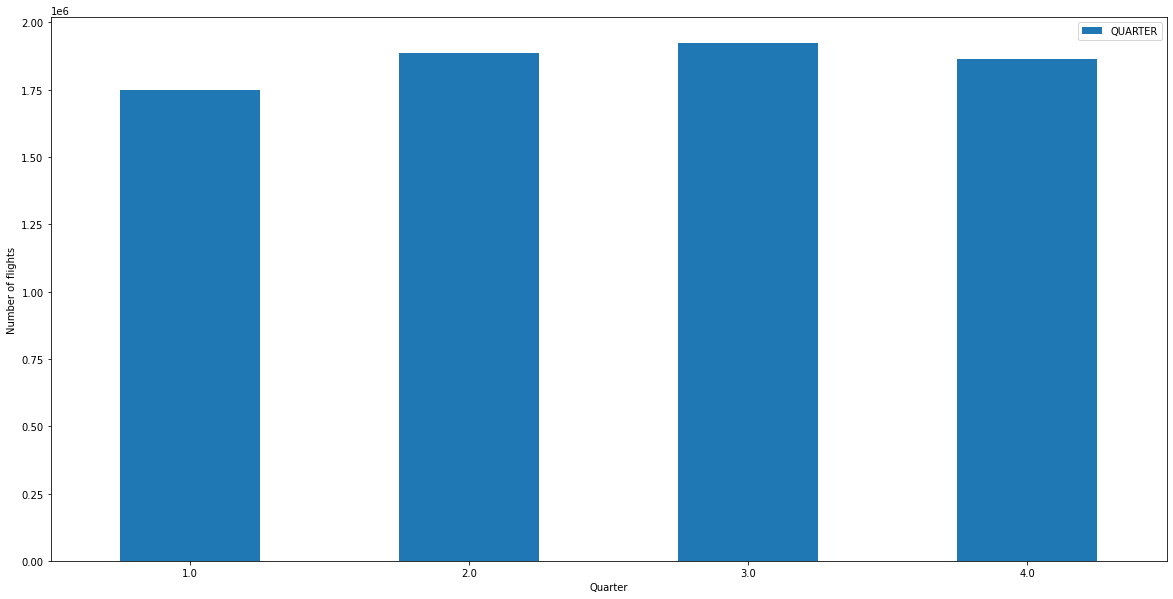

In [ ]:
data_2019_quarter = pd.DataFrame(data_2019['QUARTER'].value_counts().sort_index(axis='index'))
data_2019_quarter.plot.bar(rot=0,figsize= (20,10),xlabel='Quarter', ylabel = 'Number of flights')

It's at the same the number of flights of every Month in 2019

#**Pre-processing**

In [ ]:
data_2020['Delay'] = data_2020['ARR_DELAY'].apply(lambda x: 0 if x<=30 else 1)
data_2020 = data_2020.rename(columns={'Delay':'DELAY'})
# data_year.plot.bar(rot=0,figsize= (20,10),xlabel='Day')

In [ ]:
data_2020 = data_2020.dropna()

In [ ]:
data_2020

,index,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,ARR_DELAY,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DELAY
0,0,2020,3,7,29,3,13485,13487,MSP,1455.0,-5.0,8.0,1503.0,1543.0,6.0,1549.0,-13.0,0,54.0,40.0,1,228,0
1,1,2020,3,7,30,4,13485,13487,MSP,1455.0,-5.0,10.0,1505.0,1547.0,5.0,1552.0,-10.0,0,57.0,42.0,1,228,0
2,2,2020,3,7,31,5,13485,13487,MSP,1455.0,-5.0,10.0,1505.0,1547.0,11.0,1558.0,-4.0,0,63.0,42.0,1,228,0
3,3,2020,3,7,1,3,13487,13485,MSN,1056.0,-4.0,11.0,1107.0,1145.0,3.0,1148.0,-8.0,0,52.0,38.0,1,228,0
4,4,2020,3,7,2,4,13487,13485,MSN,1246.0,-9.0,15.0,1301.0,1338.0,4.0,1342.0,-13.0,0,56.0,37.0,1,228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900457,607341,2020,1,1,16,4,14321,12953,LGA,554.0,-6.0,96.0,730.0,827.0,19.0,846.0,65.0,0,172.0,57.0,1,269,1
2900458,607342,2020,1,1,17,5,14321,12953,LGA,633.0,33.0,18.0,651.0,800.0,4.0,804.0,23.0,0,91.0,69.0,1,269,0
2900459,607343,2020,1,1,18,6,14321,12953,LGA,657.0,-3.0,12.0,709.0,804.0,6.0,810.0,-30.0,0,73.0,55.0,1,269,0
2900460,607344,2020,1,1,19,7,14321,12953,LGA,705.0,5.0,58.0,803.0,857.0,24.0,921.0,39.0,0,136.0,54.0,1,269,1


In [ ]:
suburb_dummies = pd.get_dummies(data_2020["DEST"])

In [ ]:
X = data_2020.drop(['ARR_DELAY','DELAY','DEST'],axis = 1)
y = data_2020['DELAY']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#**Training Model**

###**NAIVE BAYES**

In [ ]:
gnb = GaussianNB()
beginnai = time.time()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
endnai = time.time()

In [ ]:
print(f"Training time: {(endnai - beginnai)}s" )

Training time: 2.269136667251587s


In [ ]:
accuracy_score(y_test,y_pred)

0.9775120145201612

###**LOGISTIC REGRESSION**

In [ ]:
logreg = LogisticRegression(C=1e5,max_iter = 1000)
logregcv = LogisticRegressionCV(cv=1e5, random_state=0,max_iter = 100)

In [ ]:
beginlog = time.time()
clf = logreg.fit(X_train, y_train)
endlog = time.time()
# clfcv = logregcv.fit(X_train_trans, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(f"Training time: {(endlog - beginlog)/60}m" )

Training time: 5.480966587861379m


In [ ]:
print(clf.score(X_test, y_test))

0.9851392847222487


###**DECISION TREE**

In [ ]:
clftree = DecisionTreeClassifier()

In [ ]:
begintree = time.time()
clftree = clftree.fit(X_train, y_train)
endtree= time.time()

In [ ]:
print(f"Training time: {(endtree - begintree)/60}m" )

Training time: 1.1827354351679484m


##**GRADIENT BOOSTING**

In [ ]:
beginboost = time.time()
clfboosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
endboost = time.time()

In [ ]:
print(f"Training time: {(endboost - beginboost)/60}m" )

Training time: 5.717215689023336m


In [ ]:
clfboosting.score(X_test, y_test)

0.9386127462358309

##**SVM**

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_trainsvm = scaler.transform(X_train)

In [ ]:
clfsvm = svm.SVC(gamma=0.001, C=100)

In [ ]:
clfsvm = make_pipeline(StandardScaler(), SVC(gamma='auto',max_iter=50000))

In [ ]:
begin = time.time()
clfsvm.fit(X_train,y_train)
end = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print(f"Training time: {(end - begin)/3600}h" )

Training time: 3.659953156312307h


In [ ]:
clfsvm.score(X_test,y_test)

0.9887217615969133

#**Conclusion**

Based on results, we can clearly see:

Naive is fastest in training time.

SVM is best model.